In [26]:
import statistics
import matplotlib.pyplot as plt
def sharpe_ratio(data, risk_free_rate=0.0):
    mean_daily_return = sum(data) / len(data)
    s = statistics.stdev(data)
    daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
    sharpe_ratio = (len(data)/365)**(1/2) * daily_sharpe_ratio
    return sharpe_ratio

In [12]:
import pandas_datareader.data as web
import pandas as pd
import statistics

dataset_moderate = pd.read_csv('Moderate_investor.csv').copy()
dataset_optimal = pd.read_csv('Optimal_investor.csv').copy()
dataset_risky = pd.read_csv('Risky_investor.csv').copy()
dataset_conservative = pd.read_csv('Conservative_investor.csv').copy()

for i in range(0, len(dataset_crypto)):
    if dataset_crypto['Date'][i] != dataset_gold['Date'][i]: 
        try:
            new_line = pd.DataFrame({"Date": dataset_crypto['Date'][i], "USD (PM)": dataset_gold['USD (PM)'][i-1]}, index=[i])
        except:
            new_line = pd.DataFrame({"Date": dataset_crypto['Date'][i], "USD (PM)": dataset_gold['USD (PM)'][i]}, index=[i])
        dataset_gold = pd.concat([dataset_gold.iloc[:i], new_line, dataset_gold.iloc[i:]], ignore_index = True)
    if pd.isnull(dataset_gold['USD (PM)'][i]):
         dataset_gold['USD (PM)'][i] =  dataset_gold['USD (PM)'][i-1]

blackout_days = [n for n in list(dataset_gold['Date'].to_numpy()) if not n in list(dataset_gold_raw['Date'].to_numpy())]

In [27]:
dataset_moderate["bit"] = dataset_moderate["Bitcoin"]*dataset_moderate["Bitcoin_price"]
dataset_moderate["gld"] = dataset_moderate["Gold"]*dataset_moderate["Gold_price"]
dataset_moderate["combined"] = dataset_moderate["bit"]+dataset_moderate["gld"]

print(sharpe_ratio(dataset_moderate["bit"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_moderate["gld"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_moderate["combined"], risk_free_rate= 0.0))

2.2194815400722394
13.681933930901053
2.574023249597307


In [31]:
dataset_optimal["bit"] = dataset_optimal["Bitcoin"]*dataset_optimal["Bitcoin_price"]
dataset_optimal["gld"] = dataset_optimal["Gold"]*dataset_optimal["Gold_price"]
dataset_optimal["combined"] = dataset_optimal["bit"]+dataset_optimal["gld"]

print(sharpe_ratio(dataset_optimal["bit"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_optimal["gld"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_optimal["combined"], risk_free_rate= 0.0))

1.9890906681531886
14.405756565524053
2.1190258307287806


In [32]:
dataset_risky["bit"] = dataset_risky["Bitcoin"]*dataset_risky["Bitcoin_price"]
dataset_risky["gld"] = dataset_risky["Gold"]*dataset_risky["Gold_price"]
dataset_risky["combined"] = dataset_risky["bit"]+dataset_risky["gld"]

print(sharpe_ratio(dataset_risky["bit"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_risky["gld"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_risky["combined"], risk_free_rate= 0.0))

2.591415154941388
14.270875431266733
3.6709538831099806


In [33]:
dataset_conservative["bit"] = dataset_conservative["Bitcoin"]*dataset_conservative["Bitcoin_price"]
dataset_conservative["gld"] = dataset_conservative["Gold"]*dataset_conservative["Gold_price"]
dataset_conservative["combined"] = dataset_conservative["bit"]+dataset_conservative["gld"]

print(sharpe_ratio(dataset_conservative["bit"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_conservative["gld"], risk_free_rate= 0.0))
print(sharpe_ratio(dataset_conservative["combined"], risk_free_rate= 0.0))

1.9890906681531906
13.04058785212369
2.113232610569357


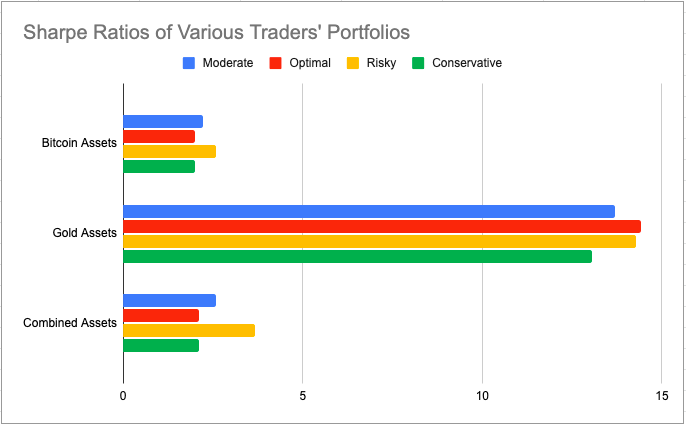